In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import numpy as np

In [2]:
df = pd.read_csv('D:/Hanger-Locust/200_locust_11142022_0002.tsv', sep='\t', skiprows=11, index_col='Time')

In [3]:
df

,Frame,X,Y,Z,X.1,Y.1,Z.1,X.2,Y.2,Z.2,...,X.1297,Y.1297,Z.1297,X.1298,Y.1298,Z.1298,X.1299,Y.1299,Z.1299,Unnamed: 3902
Time,,,,,,,,,,,,,,,,,,,,,
0.00,1,1537.634,2943.620,371.787,574.688,10.452,50.055,200.860,2469.208,358.624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.01,2,1537.635,2943.619,371.791,574.685,10.449,50.040,200.857,2469.210,358.608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.02,3,1537.634,2943.615,371.800,574.678,10.445,50.031,200.856,2469.212,358.605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.03,4,1537.637,2943.622,371.795,574.683,10.445,50.013,200.860,2469.209,358.610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.04,5,1537.691,2943.882,370.912,574.651,10.268,49.610,200.787,2469.282,358.030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969.67,96968,1537.651,2943.890,370.864,574.756,10.420,49.738,200.493,2469.349,357.976,...,NaN,NaN,NaN,NaN,NaN,NaN,1621.367,2541.643,84.370,NaN
969.68,96969,1537.652,2943.888,370.852,574.755,10.424,49.743,200.487,2469.346,357.983,...,NaN,NaN,NaN,NaN,NaN,NaN,1621.398,2541.607,84.384,NaN
969.69,96970,1537.650,2943.888,370.850,574.757,10.418,49.743,200.484,2469.352,357.986,...,NaN,NaN,NaN,NaN,NaN,NaN,1621.345,2541.636,84.367,NaN


In [4]:
df.columns

Index(['Frame', ' X', ' Y', ' Z', ' X.1', ' Y.1', ' Z.1', ' X.2', ' Y.2',
       ' Z.2',
       ...
       ' X.1297', ' Y.1297', ' Z.1297', ' X.1298', ' Y.1298', ' Z.1298',
       ' X.1299', ' Y.1299', ' Z.1299', 'Unnamed: 3902'],
      dtype='object', length=3902)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Float64Index: 96972 entries, 0.0 to 969.71
Columns: 3902 entries, Frame to Unnamed: 3902
dtypes: float64(3901), int64(1)
memory usage: 2.8 GB
None


In [6]:
X_subset = [f' X.{_}' for _ in range(1,1300)]
Y_subset = [f' Y.{_}' for _ in range(1,1300)]
Z_subset = [f' Z.{_}' for _ in range(1,1300)]

In [7]:
print(df[X_subset].abs().min().min())
print(df[X_subset].abs().max().max())
print(df[Y_subset].abs().min().min())
print(df[Y_subset].abs().max().max())
print(df[Z_subset].abs().min().min())
print(df[Z_subset].abs().max().max())

7.606
3598.759
9.982
3130.672
0.404
2654.965


In [8]:
xmin = 0
xmax = 2200
ymin = 1000
ymax = 3200

In [9]:
# We notice that a lot of the entries are NaN. We would like to get rid of the columns where > 90% of the data is NaN. 
# We will create a new dataframe ndf to do this.
ndf = df.copy()

cols_to_delete = ndf.columns[ndf.isnull().sum()/len(df) > .90]
ndf.drop(cols_to_delete, axis = 1, inplace = True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 96972 entries, 0.0 to 969.71
Columns: 3902 entries, Frame to Unnamed: 3902
dtypes: float64(3901), int64(1)
memory usage: 2.8 GB


In [11]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 96972 entries, 0.0 to 969.71
Columns: 799 entries, Frame to  Z.1160
dtypes: float64(798), int64(1)
memory usage: 591.9 MB


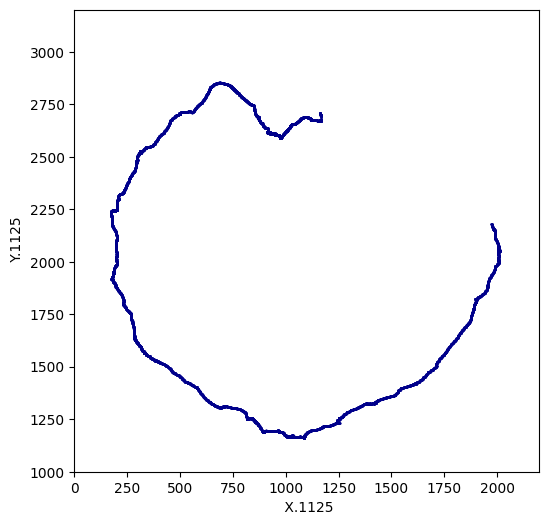

In [12]:
LocustNumber = int(random.choice(ndf.columns[1:])[3:])

fig = plt.figure(figsize=(6,6))

ax = plt.subplot(111)
ndf[[f' X.{LocustNumber}', f' Y.{LocustNumber}', f' Z.{LocustNumber}']].plot.scatter(x=f' X.{LocustNumber}', y=f' Y.{LocustNumber}', c='DarkBlue', s=0.5, ax=ax )
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)



plt.show()

In [14]:
for col in ndf.columns[1:]:
    ndf[f'V{col}'] = ndf[col].shift(-1) - ndf[col]


C:\Users\Mark\AppData\Local\Temp\ipykernel_19240\3816310142.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndf[f'V{col}'] = ndf[col].shift(-1) - ndf[col]
C:\Users\Mark\AppData\Local\Temp\ipykernel_19240\3816310142.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndf[f'V{col}'] = ndf[col].shift(-1) - ndf[col]
C:\Users\Mark\AppData\Local\Temp\ipykernel_19240\3816310142.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

In [15]:
ndf

,Frame,X,Y,Z,X.1,Y.1,Z.1,X.2,Y.2,Z.2,...,V Z.1146,V X.1154,V Y.1154,V Z.1154,V X.1158,V Y.1158,V Z.1158,V X.1160,V Y.1160,V Z.1160
Time,,,,,,,,,,,,,,,,,,,,,
0.00,1,1537.634,2943.620,371.787,574.688,10.452,50.055,200.860,2469.208,358.624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.01,2,1537.635,2943.619,371.791,574.685,10.449,50.040,200.857,2469.210,358.608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.02,3,1537.634,2943.615,371.800,574.678,10.445,50.031,200.856,2469.212,358.605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.03,4,1537.637,2943.622,371.795,574.683,10.445,50.013,200.860,2469.209,358.610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.04,5,1537.691,2943.882,370.912,574.651,10.268,49.610,200.787,2469.282,358.030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969.67,96968,1537.651,2943.890,370.864,574.756,10.420,49.738,200.493,2469.349,357.976,...,0.012,0.124,-0.037,0.120,-0.146,1.103,-0.234,0.246,0.533,0.110
969.68,96969,1537.652,2943.888,370.852,574.755,10.424,49.743,200.487,2469.346,357.983,...,-0.008,0.109,0.012,0.124,-0.048,1.207,-0.225,0.184,0.495,0.240
969.69,96970,1537.650,2943.888,370.850,574.757,10.418,49.743,200.484,2469.352,357.986,...,0.002,0.093,0.009,0.010,-0.004,1.004,-0.239,0.146,0.460,-0.081


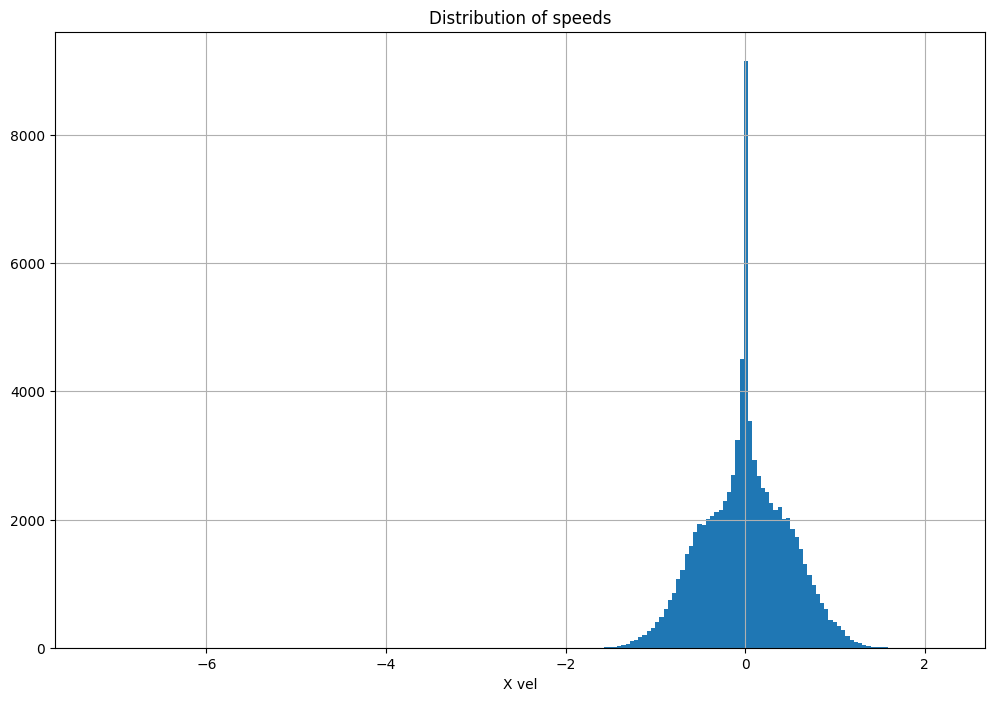

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)

ax.set_xlabel('X vel')

ndf.hist(ax = ax, column='V X.50', bins=200)
plt.title('Distribution of speeds')
plt.savefig('Distribution_of_speeds.png')
plt.show()

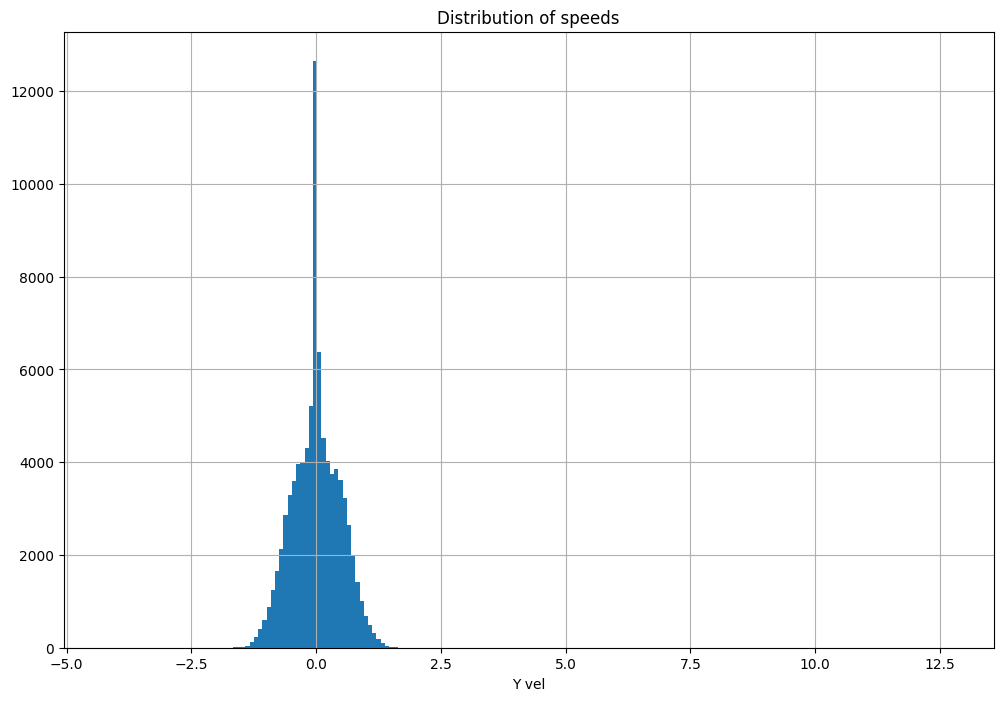

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)

ax.set_xlabel('Y vel')

ndf.hist(ax = ax, column='V Y.50', bins=200)
plt.title('Distribution of speeds')
plt.savefig('Distribution_of_speeds.png')
plt.show()

In [46]:
ndf

,Frame,X,Y,Z,X.1,Y.1,Z.1,X.2,Y.2,Z.2,...,V X.1154,V Y.1154,V Z.1154,V X.1158,V Y.1158,V Z.1158,V X.1160,V Y.1160,V Z.1160,50.speed
Time,,,,,,,,,,,,,,,,,,,,,
0.00,1,1537.634,2943.620,371.787,574.688,10.452,50.055,200.860,2469.208,358.624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.146649
0.01,2,1537.635,2943.619,371.791,574.685,10.449,50.040,200.857,2469.210,358.608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.055172
0.02,3,1537.634,2943.615,371.800,574.678,10.445,50.031,200.856,2469.212,358.605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
0.03,4,1537.637,2943.622,371.795,574.683,10.445,50.013,200.860,2469.209,358.610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.063632
0.04,5,1537.691,2943.882,370.912,574.651,10.268,49.610,200.787,2469.282,358.030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.036878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969.67,96968,1537.651,2943.890,370.864,574.756,10.420,49.738,200.493,2469.349,357.976,...,0.124,-0.037,0.120,-0.146,1.103,-0.234,0.246,0.533,0.110,NaN
969.68,96969,1537.652,2943.888,370.852,574.755,10.424,49.743,200.487,2469.346,357.983,...,0.109,0.012,0.124,-0.048,1.207,-0.225,0.184,0.495,0.240,NaN
969.69,96970,1537.650,2943.888,370.850,574.757,10.418,49.743,200.484,2469.352,357.986,...,0.093,0.009,0.010,-0.004,1.004,-0.239,0.146,0.460,-0.081,NaN


In [42]:
ndf['50.speed'] = np.sqrt((ndf['V X.50'])**2 + (ndf['V Y.50'])**2)

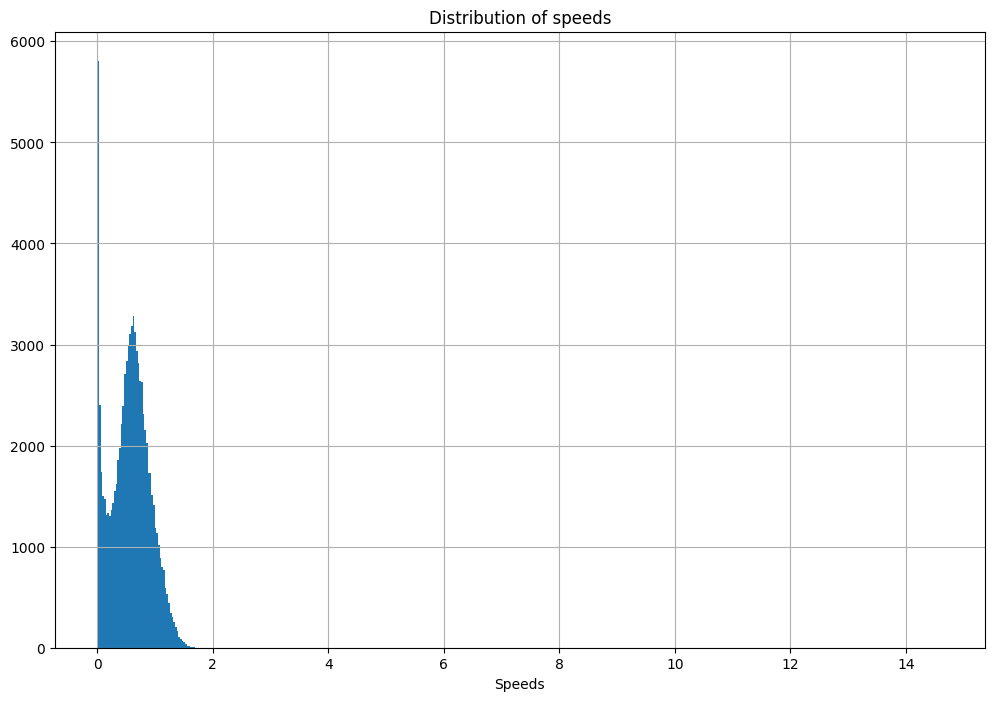

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)

ax.set_xlabel('Speeds')

ndf.hist(ax = ax, column='50.speed', bins=500)
plt.title('Distribution of speeds')
plt.savefig('Distribution_of_speeds.png')
plt.show()

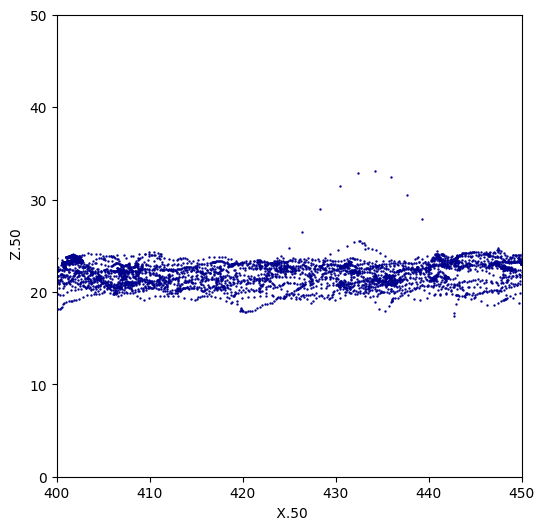

In [54]:
LocustNumber = 50

fig = plt.figure(figsize=(6,6))

ax = plt.subplot(111)
ndf[[f' X.{LocustNumber}', f' Y.{LocustNumber}', f' Z.{LocustNumber}']].plot.scatter(x=f' X.{LocustNumber}', y=f' Z.{LocustNumber}', c='DarkBlue', s=0.5, ax=ax )
ax.set_xlim(400,450)
ax.set_ylim(0,50)



plt.show()

In [78]:
testdf50 = ndf[['Frame',' X.50', ' Y.50', ' Z.50']].dropna()
testdf50

,Frame,X.50,Y.50,Z.50
Time,,,,
0.00,1,1517.706,2390.300,38.467
0.01,2,1517.615,2390.415,38.443
0.02,3,1517.577,2390.455,38.469
0.03,4,1517.577,2390.455,38.472
0.04,5,1517.545,2390.400,37.814
...,...,...,...,...
854.45,85446,1772.386,2708.220,32.560
854.46,85447,1772.623,2709.752,37.676
854.47,85448,1774.630,2715.356,31.652


In [79]:
testdf50[(testdf50[' Z.50'] > 30) & (testdf50[' X.50'] > 420) & (testdf50[' X.50'] < 450) ]


,Frame,X.50,Y.50,Z.50
Time,,,,
809.54,80955,430.476,1566.227,31.447
809.55,80956,432.394,1562.339,32.817
809.56,80957,434.195,1558.526,33.134
809.57,80958,435.947,1554.798,32.438
809.58,80959,437.610,1551.004,30.504


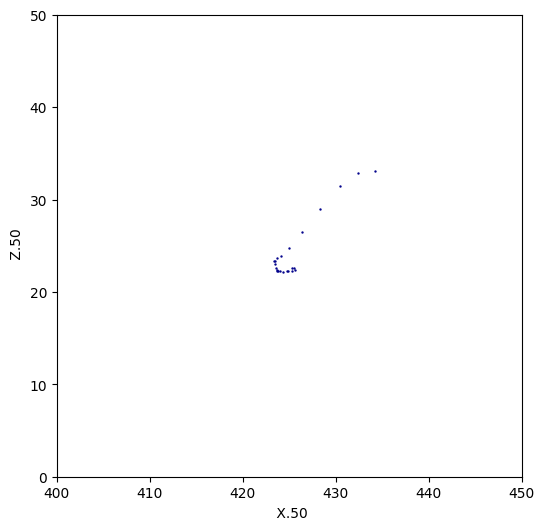

In [96]:
LocustNumber = 50

fig = plt.figure(figsize=(6,6))

ax = plt.subplot(111)
ndf[(ndf['Frame'] >= 80935) & (ndf['Frame'] <= 80957)][[f' X.{LocustNumber}', f' Y.{LocustNumber}', f' Z.{LocustNumber}']].plot.scatter(x=f' X.{LocustNumber}', y=f' Z.{LocustNumber}', c='DarkBlue', s=0.5, ax=ax )
ax.set_xlim(400,450)
ax.set_ylim(0,50)



plt.show()

In [91]:
ndf[(ndf['Frame'] >= 80935) & (ndf['Frame'] <= 80979)]['50.speed']

Time
809.34    0.696840
809.35    0.341352
809.36    0.064405
809.37    0.324446
809.38    0.598836
809.39    0.489949
809.40    0.370645
809.41    0.204832
809.42    0.090477
809.43    0.028601
809.44    0.106024
809.45    0.133015
809.46    0.096177
809.47    0.180228
809.48    0.414663
809.49    0.746247
809.50    1.710765
809.51    3.094593
809.52    4.441118
809.53    4.751015
809.54    4.335351
809.55    4.216938
809.56    4.119161
809.57    4.142464
809.58    4.042008
809.59    3.763124
809.60    2.848322
809.61    1.965309
809.62    0.024021
809.63    0.708668
809.64    0.585239
809.65    0.271183
809.66    0.058009
809.67    0.142874
809.68    0.255633
809.69    0.331109
809.70    0.257661
809.71    0.126775
809.72    0.094202
809.73    0.085235
809.74    0.035114
809.75    0.085983
809.76    0.240508
809.77    0.417925
809.78    0.612883
Name: 50.speed, dtype: float64